In [1]:
#https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko
#코드 출처

### 1. 라이브러리

In [37]:
import tensorflow as tf
import numpy as np

### 2. 데이터준비
    - MNIST 데이터 셋(데이터 베이스 이름 mnist)
    - 손글씨 이미지, 60,000장 훈련데이터, 10,000장 테스트데이터
    - 28*28 픽셀, 흑백이미지

In [14]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0

In [15]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [18]:
x_train[0][5:10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
        0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
        0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.11764706, 0.14117647,
        0.36862745, 0.60392157, 0.66666667, 0.99215686, 0.99215686,
        0.99215686, 0.99215686, 0.99215686, 0.88235294, 0.6745098 ,
        0.99215686, 0.94901961, 0.76470588, 0.25098039, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.19215686, 0.93333333, 0.99215686,
        0.99215686, 0.99215686, 0.99215686, 0.99215686, 0.99215686,
        0.99215686, 0.9921

### 3. 이미지 글씨 확인

label은 =  5


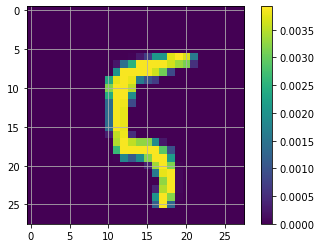

In [52]:
import matplotlib.pyplot as plt

i=100

plt.figure()
plt.imshow(x_train[i])
plt.colorbar()
plt.grid(True)

print("label은 = ", y_train[i])

label은 =  5


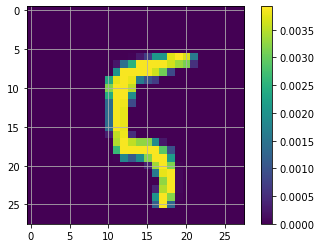

In [53]:
import matplotlib.pyplot as plt

no=100

plt.figure()
plt.imshow(x_train[no])
plt.colorbar()
plt.grid(True)

print("label은 = ", y_train[no])

In [46]:
def draw_train(no) :
    #plt.figure() 써도되고 안써도 됨
    plt.imshow(x_train[no])
    plt.colorbar()
    plt.grid(True)
    print("train label은 = ", y_train[no])
    
def draw_test(no) :
    plt.figure()
    plt.imshow(x_train[no])
    plt.colorbar()
    plt.grid(True)
    print("test label은 = ", y_test[no])

train label은 =  4


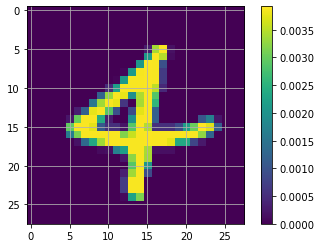

In [47]:
draw_train(150)

### 4. 데이터 전처리
    - 픽셀값의 범위가 0~255 사이
    - 0~1 사이로 변경
    

In [29]:
x_train, x_test = x_train/255.0, x_test/255.0
#y_train, y_test를 안쓴이유는 정규화된 레이블이기 때문에 정규화 할 필요 없음

### 5. 층을 쌓아서 모델을 구성
    - 옵티마이저와 손실함수 선택

In [27]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), #Flatten은 28*28격자를 일자로 풀어내는것 총784개
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dropout(0.2),
                                   tf.keras.layers.Dense(10,activation='softmax')])

In [28]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

### 6. 모델 훈련 

In [30]:
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7328 - accuracy: 0.5661
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6270 - accuracy: 0.8301
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4607 - accuracy: 0.8705
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3973 - accuracy: 0.8869
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3602 - accuracy: 0.8951


### 7. 평가

In [31]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 0s - loss: 0.2984 - accuracy: 0.9139


[0.2984362542629242, 0.9139000177383423]

In [32]:
#새로운 데이터가 들어오면 테스트하기 위해 이 과정을 한 것

### 8. 테스트 데이터 예측

In [35]:
predictions= model.predict(x_test)
predictions[0]

array([7.4601310e-05, 6.4751413e-07, 6.4628337e-05, 1.1840198e-03,
       3.6690749e-06, 1.0435822e-04, 1.5036514e-08, 9.9289250e-01,
       4.6665031e-05, 5.6289206e-03], dtype=float32)

In [38]:
np.argmax(predictions[0])

7

In [39]:
y_test[0]

7

test label은 =  7


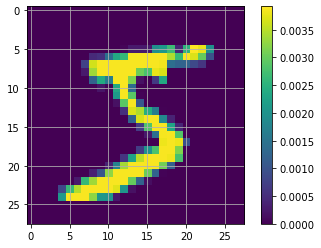

In [48]:
draw_test(0)

### 9. 배포(실제 적용 단계)
    - 손으로 쓴 이미지를 (28*28)
    - ()/255.0
    - model predictions(input_image)
    - 결과값이?